In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import imread
from matplotlib.pyplot import figure
import random

# Substitute Gaussian noise Case
## Training data Loading

In [3]:
with open('GN/MultiCoorTraining.pkl', 'rb') as f:
    coor = pickle.load(f)
    
drones = []
for i in range(4):
    with open(f'GN/ExperimentSim3RTraining/crazyflie{i}.pkl', 'rb') as f:
        crazy = pickle.load(f)
        drones.append(crazy)

## Data preparation

Checking the different entries for any discrepancy

In [5]:
newDrones = []

for j in range(len(drones)):
    crazy = drones[j]
    recent = 0
    new = [crazy[0]]
    for i in range(len(crazy)):
        if i == 0:
            continue

        if crazy[i-1][1] == crazy[i][1]:
            continue

        new.append(crazy[i])
    print(len(crazy))
    print(len(new))
    newDrones.append(new)

1000
1000
1000
1000
1000
1000
831
831


Calculating the run search times by taking the difference from the previous to the next iteration

In [7]:
for i in range(len(coor)):
    if i == 0:
        continue
    
    coor[i-1][1] = coor[i][1]-coor[i-1][1]
coor.pop(-1)

[258, 1746607637.3347738]

Removing all runs with human intervention (>800 seconds)

In [9]:
print(len(coor))

for i in range(len(coor)):
    coor[i][0] = i

996


In [10]:
pops = []
for i in reversed(range(len(coor))):
    if coor[i][1] > 800:
        pops.append(i)
        for x in range(len(newDrones)-1):
            newDrones[x].pop(i)
            
        for x in reversed(range(len(newDrones[3]))):
            if newDrones[3][x][1] == i:
                newDrones[3].pop(x)
        
        print(coor[i])
        coor.pop(i)
        
print(len(pops))

[978, 20644.89994263649]
[928, 953.9107694625854]
[905, 846.909964799881]
[882, 841.0503001213074]
[854, 1391.4903740882874]
[849, 4037.660174846649]
[846, 806.1200878620148]
[840, 1128.9703917503357]
[815, 857.6907298564911]
[801, 1164.499927997589]
[796, 803.6499285697937]
[756, 819.830094575882]
[749, 813.5297648906708]
[744, 1046.4498002529144]
[741, 939.1998448371887]
[739, 829.3193309307098]
[738, 8735.262786626816]
[731, 1636.470120191574]
[729, 858.760155916214]
[723, 975.6601231098175]
[696, 953.5400776863098]
[686, 921.0791883468628]
[677, 919.5798237323761]
[664, 2781.3099761009216]
[654, 1170.7498002052307]
[647, 30191.83005785942]
[632, 4996.879441022873]
[624, 8433.109800815582]
[614, 903.7399771213531]
[591, 822.3402009010315]
[590, 11690.899597883224]
[571, 20493.760008335114]
[567, 1227.9099247455597]
[563, 1031.1999998092651]
[560, 1123.1900992393494]
[559, 1308.0501396656036]
[553, 982.1698176860809]
[550, 975.9700140953064]
[545, 3956.409854412079]
[516, 806.5800054

## Plotting

### Training Time
plotting time per iteration

55.55979537963867
799.4599144458771
388.3013178619899


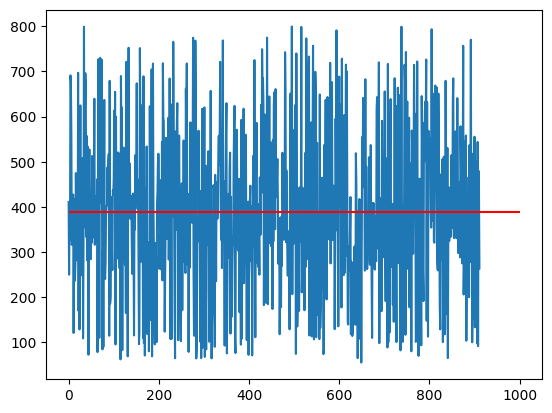

In [12]:
x = [i for i in range(len(coor))]
y = [coor[j][1] for j in range(len(coor))]
print(min(y))
print(max(y))
avg = sum(y)/len(y)
print(avg)
plt.plot(x,y)
plt.hlines(avg, 0 ,1000, color='red')
plt.savefig('subGNTrainingTime.png')

### Training search types
collecting all search types for graphing

In [14]:
names = []
allWins = []
allFails = []
allCalls = []

for i in range(len(newDrones)):
    crazy = newDrones[i]
    print(crazy[0][0][1:])
    names.append(crazy[0][0][1:])
    fails = 0
    wins = 0
    callbacks = 0
    for j in crazy:
        case = j[4]
        if case == 0:
            fails+= 1
        elif case == 1:
            wins += 1
        else:
            callbacks+= 1
    allWins.append(wins)
    allFails.append(fails)
    allCalls.append(callbacks)
    print(f'Wins {wins}') 
    print(f'Fails {fails}') 
    print(f'Callbacks {callbacks}') 
    print()
    
di = {
    'Successful Searches': allWins,
    'Unfinished run' : allFails,
    'Callbacks' : allCalls
}
print(sum(allWins), sum(allFails), sum(allCalls))

crazyflie0
Wins 153
Fails 548
Callbacks 215

crazyflie1
Wins 137
Fails 549
Callbacks 230

crazyflie2
Wins 153
Fails 533
Callbacks 230

crazyflie3
Wins 155
Fails 438
Callbacks 174

598 2068 849


598


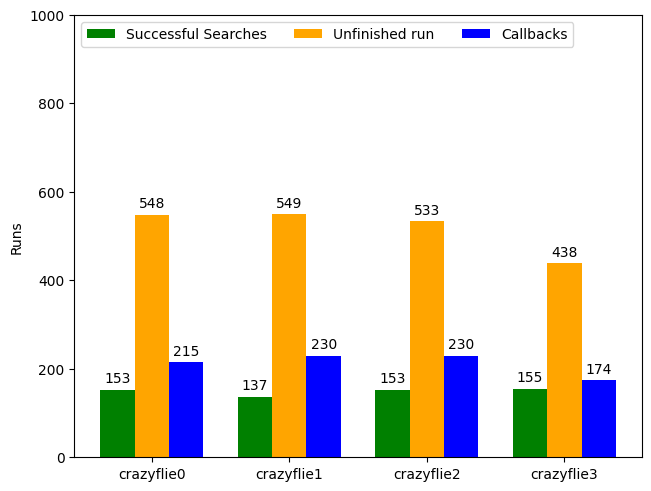

In [15]:
x = np.arange(len(names))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
color = ['green', 'orange', 'blue']

fig, ax = plt.subplots(layout='constrained')

for name, count in di.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, count, width, label=name, color=color[multiplier])
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Runs')

ax.set_xticks(x + width, names)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1000)


plt.savefig('subGNTraining.png')
print(sum(allWins))

### Training strategies

Select 4 random iteration, add the starting point and sort by iteration for cleaner graph

In [17]:
boxes = [(21.0, -5.0),(15.0, 6.0),(5.0,0.3),(-2.0,7.2),(-2.2, -2.6),(-5.6,-5.9),(20.2, -0.2),(11.59,0.67)]
testCases = []    
indexs =[325, 670, 794, 953]
for r in range(4):
    #index = random.randint(0, len(coor))
    ite = indexs[r]
    drones = []
    for i in range(len(newDrones)-1):
        for j in range(len(newDrones[i])):
            if ite == newDrones[i][j][1]:
                crazy = newDrones[i][j][:]
                box = [boxes[x] for x in crazy[2]]
                box.insert(0, (0.0,0.0))
                crazy.append(box[:])
                drones.append(crazy)

    for i in range(len(newDrones[3])):
        if newDrones[3][i][1] == crazy[1]:
            c = newDrones[3][i]
            box = [boxes[x] for x in c[2]]
            c.append(box)
            drones.append(c)
    
    testCases.append(drones)

testCases.sort(key=lambda x: x[0][1])

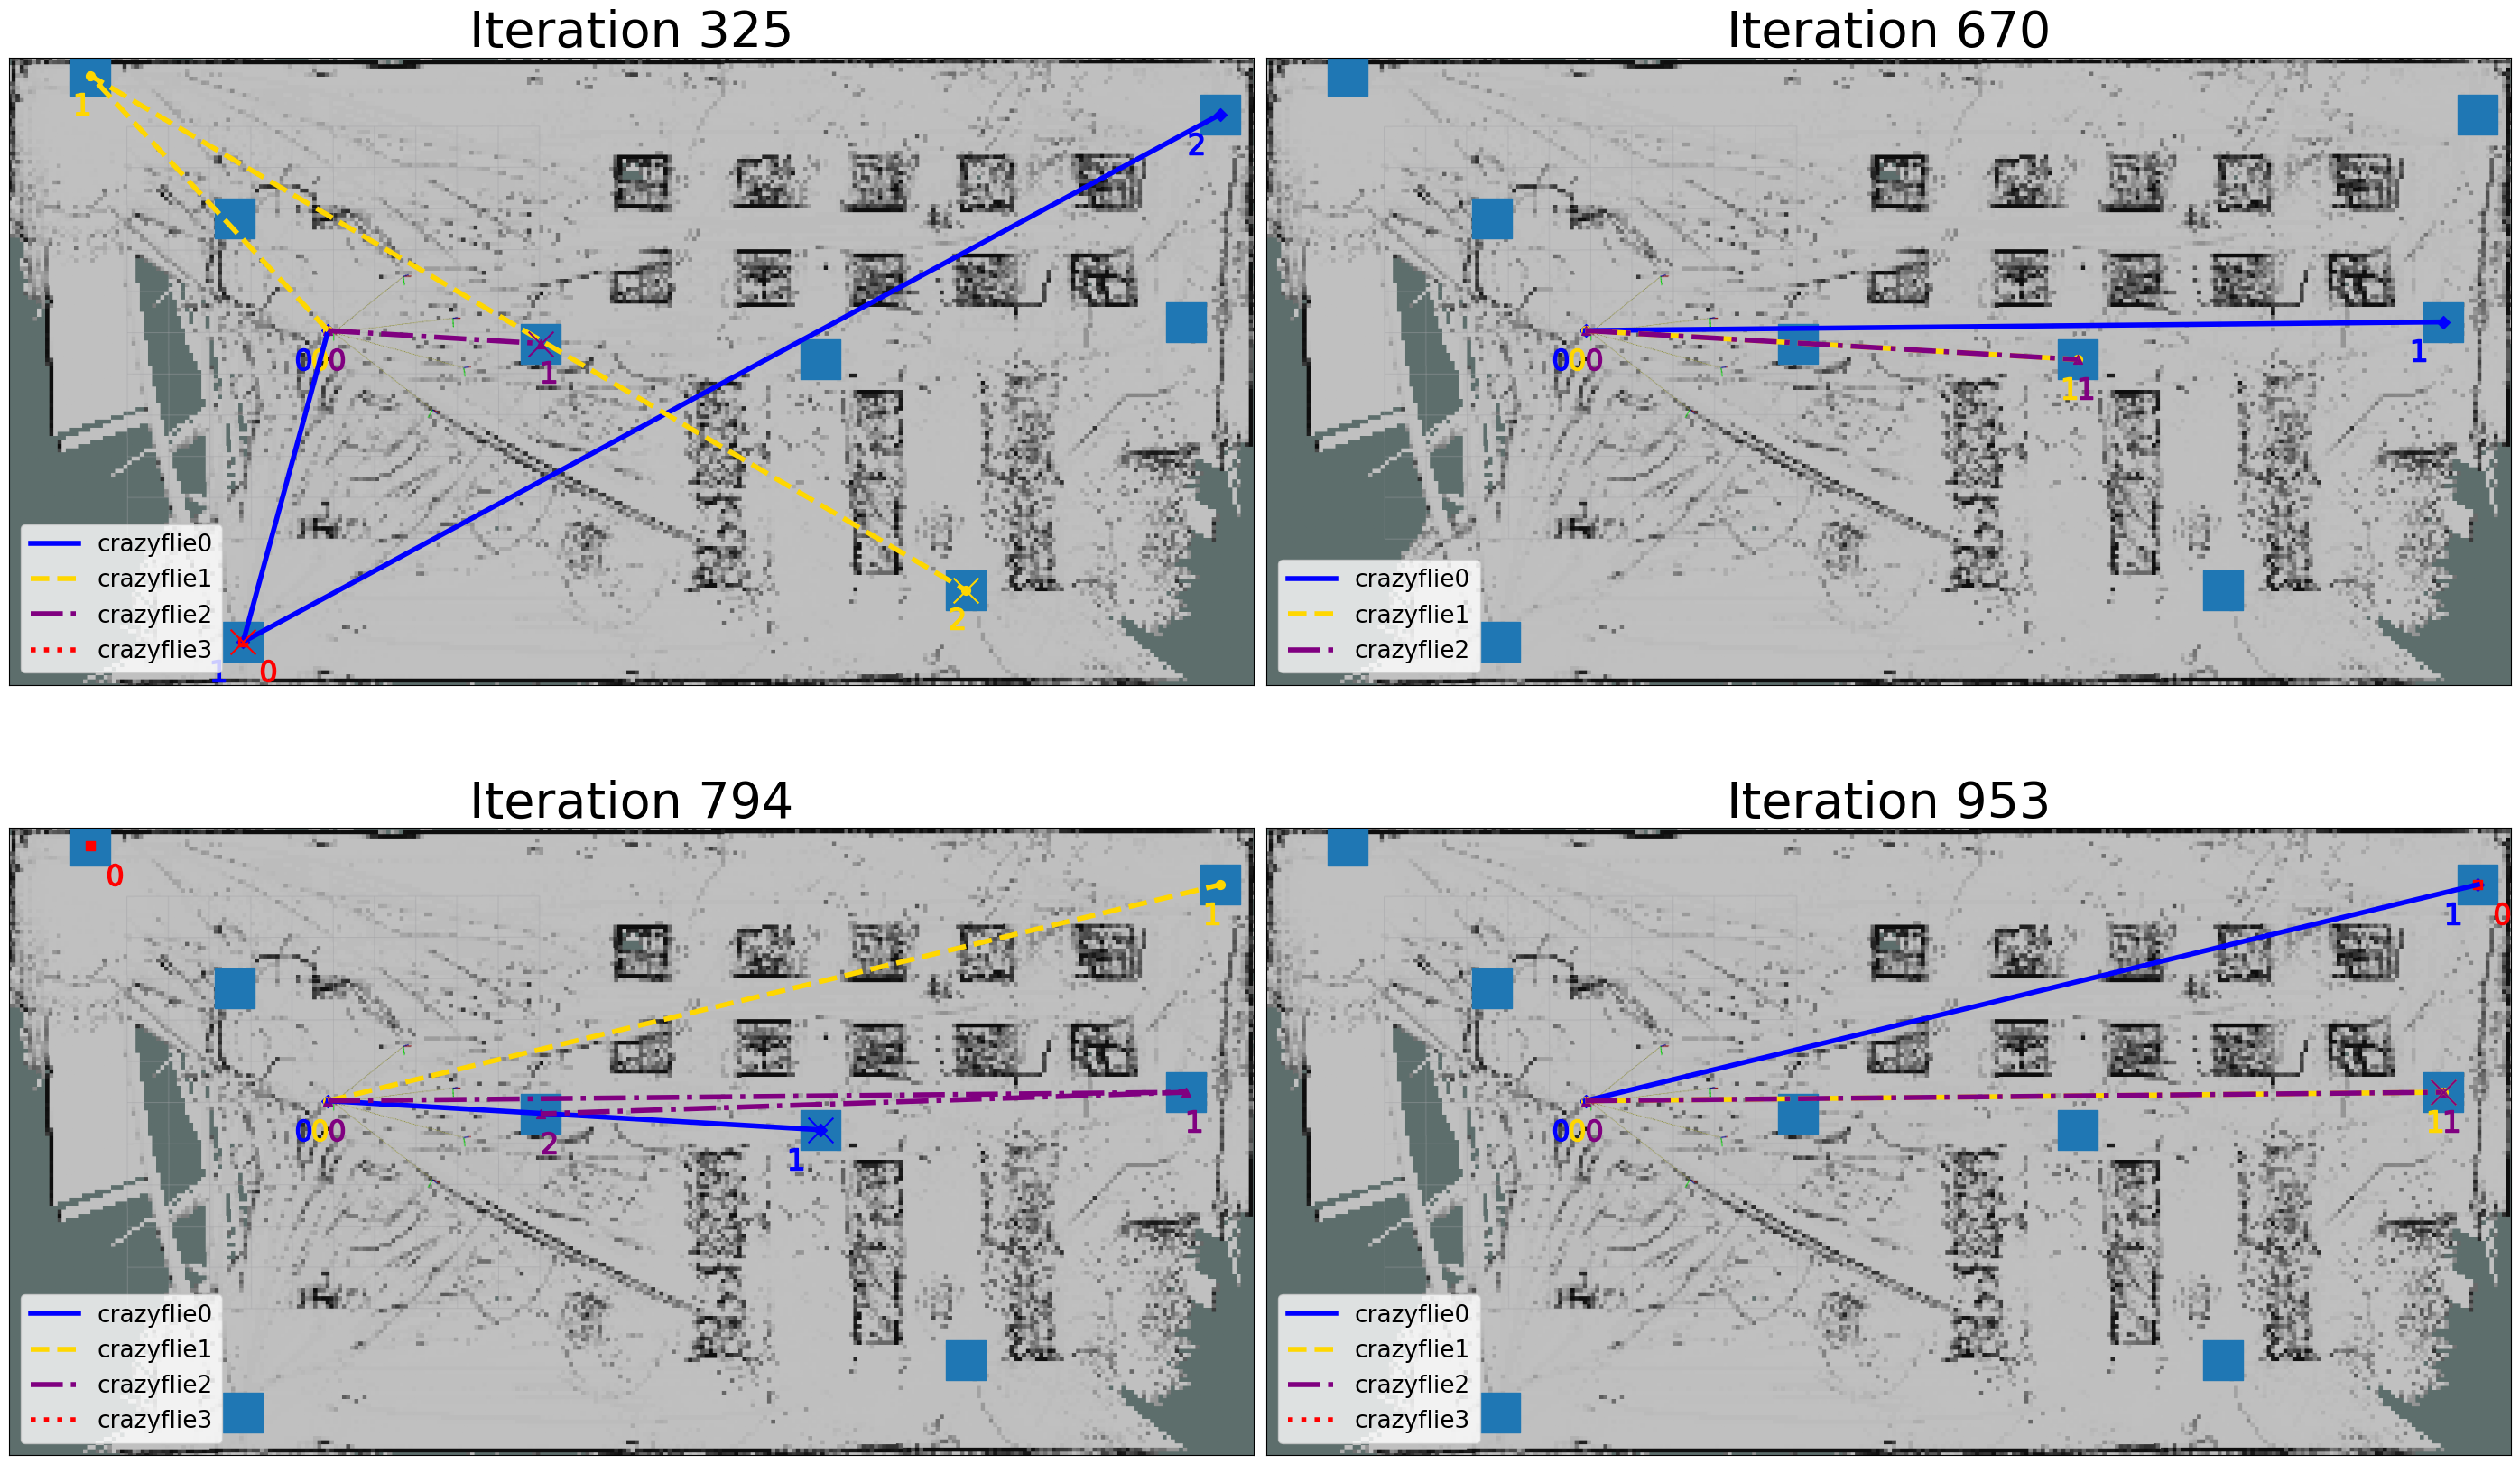

In [18]:
figure(figsize=(28, 18))    
for tes in range(len(testCases)):
    types = ['-','--','-.',':']
    n = ['Cr0','Cr1','Cr2','Cr3']
    color = ["blue",'gold','purple','red']
    shapes = ['D','o','^','s']
    counter = 0
    mult = -1.5
    
    img = imread("FieldM.png")

    plt.subplot(2, 2, tes+1)
    plt.imshow(img,zorder=0)

    xb = [(boxes[x][0]+7.5)*51.706 for x in range(len(boxes))]
    yb = [(boxes[x][1]+6.3)*52.62 for x in range(len(boxes))]
    plt.scatter(xb,yb, marker = 's',s=1000)

    for i in testCases[tes]:
        x = [(i[-1][x][0]+7.5)*51.706 for x in range(len(i[-1]))]
        y = [(i[-1][x][1]+6.3)*52.62 for x in range(len(i[-1]))]
        case = i[4]
        
        plt.plot(x,y, ls = types[counter],label=names[counter],linewidth = '4', color = color[counter])
        for i in range(len(x)):
            plt.scatter(x[i],y[i], marker = shapes[counter],s=50, c=color[counter])
            plt.scatter(x[i]+20*mult,y[i]+35, marker = f"${i}$",s=300, c=color[counter])
        if case == 0:
            plt.scatter(x[i],y[i], marker = 'x',s=400, c=color[counter], zorder=20)
        counter+= 1
        mult+=1

    plt.legend(loc =3, prop={'size': 19})
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])
    plt.title(f'Iteration {testCases[tes][0][1]}',fontsize = 40)
plt.tight_layout(pad=1.0)
plt.savefig('subGNTrainingStrat.png')
plt.show()

## Test data loading

In [20]:
with open('GN/MultiCoor.pkl', 'rb') as f:
    coor = pickle.load(f)
    
drones = []
for i in range(4):
    with open(f'GN/ExperimentSim3R/crazyflie{i}.pkl', 'rb') as f:
        crazy = pickle.load(f)
        drones.append(crazy)

## Data preparation

Checking the different entries for any discrepancy

In [22]:
newDrones = []

for j in range(len(drones)):
    crazy = drones[j]
    recent = 0
    new = [crazy[0]]
    for i in range(len(crazy)):
        if i == 0:
            continue

        if crazy[i-1][1] == crazy[i][1]:
            continue

        new.append(crazy[i])
    print(len(crazy))
    print(len(new))
    newDrones.append(new)

200
200
200
200
200
200
169
169


Calculating the run search times by taking the difference from the previous to the next iteration

In [24]:
for i in range(len(coor)):
    if i == 0:
        continue
    
    coor[i-1][1] = coor[i][1]-coor[i-1][1]
coor.pop(-1)

[200, 1746737333.4151127]

Removing all runs with human intervention (>800 seconds)

In [26]:
print(len(coor))

for i in range(len(coor)):
    coor[i][0] = i


200


In [27]:
pops = []
for i in reversed(range(len(coor))):
    if coor[i][1] > 800:
        pops.append(i)
        for x in range(len(newDrones)-1):
            newDrones[x].pop(i)
            
        for x in reversed(range(len(newDrones[3]))):
            if newDrones[3][x][1] == i:
                newDrones[3].pop(x)
            
        print(coor[i])
        coor.pop(i)
print(len(pops))

[197, 1043.209894657135]
[180, 811.5200691223145]
[174, 6208.620089292526]
[161, 858.09916472435]
[155, 2375.2499980926514]
[152, 894.4300529956818]
[132, 988.439909696579]
[122, 874.7598164081573]
[94, 28483.4400472641]
[91, 824.1799437999725]
[73, 817.2700834274292]
[71, 4211.280159711838]
[64, 1039.9698662757874]
[58, 861.3198342323303]
[50, 894.3699305057526]
[42, 911.4197976589203]
[38, 1033.3198080062866]
[28, 831.5598437786102]
[13, 1042.1998620033264]
[8, 863.4300830364227]
[6, 858.3396894931793]
[2, 4630.869567632675]
22


## Plotting

### Test Search Time
plotting time per iteration

54.99006962776184
782.7101271152496
370.8181862027458


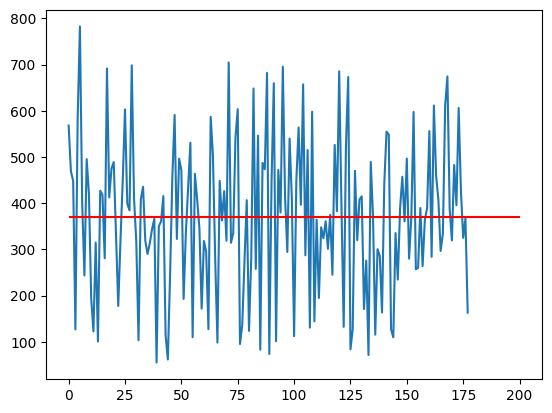

In [29]:
x = [i for i in range(len(coor))]
y = [coor[j][1] for j in range(len(coor))]
print(min(y))
print(max(y))
avg = sum(y)/len(y)
print(avg)
plt.plot(x,y)
plt.hlines(avg, 0 ,200, color='red')
plt.savefig('subGNTime.png')

### Test search types
collecting all search types for graphing

In [31]:
names = []
allWins = []
allFails = []
allCalls = []

for i in range(len(newDrones)):
    crazy = newDrones[i]
    print(crazy[0][0][1:])
    names.append(crazy[0][0][1:])
    fails = 0
    wins = 0
    callbacks = 0
    for j in crazy:
        case = j[4]
        if case == 0:
            fails+= 1
        elif case == 1:
            wins += 1
        else:
            callbacks+= 1
    allWins.append(wins)
    allFails.append(fails)
    allCalls.append(callbacks)
    print(f'Wins {wins}') 
    print(f'Fails {fails}') 
    print(f'Callbacks {callbacks}') 
    print()
    
di = {
    'Successful Searches': allWins,
    'Unfinished run' : allFails,
    'Callbacks' : allCalls
}

print(sum(allWins), sum(allFails), sum(allCalls))

crazyflie0
Wins 29
Fails 106
Callbacks 43

crazyflie1
Wins 35
Fails 90
Callbacks 53

crazyflie2
Wins 34
Fails 89
Callbacks 55

crazyflie3
Wins 31
Fails 75
Callbacks 41

129 360 192


129


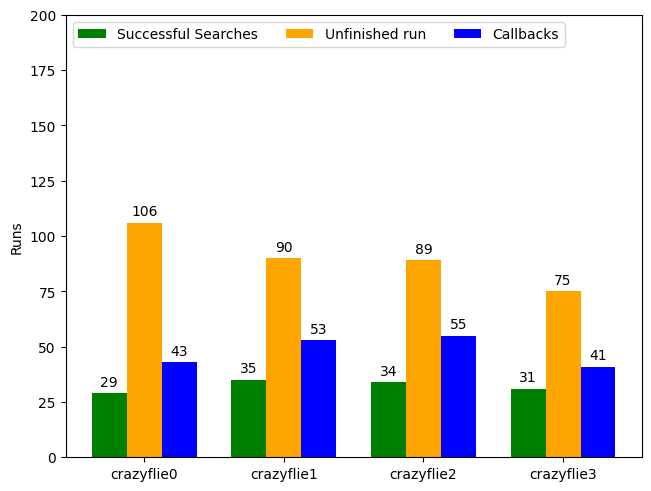

In [32]:
x = np.arange(len(names))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
color = ['green', 'orange', 'blue']

fig, ax = plt.subplots(layout='constrained')

for name, count in di.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, count, width, label=name, color=color[multiplier])
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Runs')
ax.set_xticks(x + width, names)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 200)


plt.savefig('subGN.png')
print(sum(allWins))

### Test strategies

Select 4 random iteration, add the starting point and sort by iteration for cleaner graph

In [34]:
boxes = [(21.0, -5.0),(15.0, 6.0),(5.0,0.3),(-2.0,7.2),(-2.2, -2.6),(-5.6,-5.9),(20.2, -0.2),(11.59,0.67)]
testCases = []    
indexs =[22, 60, 156, 190]
for r in range(4):
    #index = random.randint(0, len(coor))
    ite = indexs[r]
    drones = []
    for i in range(len(newDrones)-1):
        for j in range(len(newDrones[i])):
            if ite == newDrones[i][j][1]:
                crazy = newDrones[i][j][:]
                box = [boxes[x] for x in crazy[2]]
                box.insert(0, (0.0,0.0))
                crazy.append(box[:])
                drones.append(crazy)

    for i in range(len(newDrones[3])):
        if newDrones[3][i][1] == crazy[1]:
            c = newDrones[3][i]
            box = [boxes[x] for x in c[2]]
            c.append(box)
            drones.append(c)
    
    testCases.append(drones)

testCases.sort(key=lambda x: x[0][1])


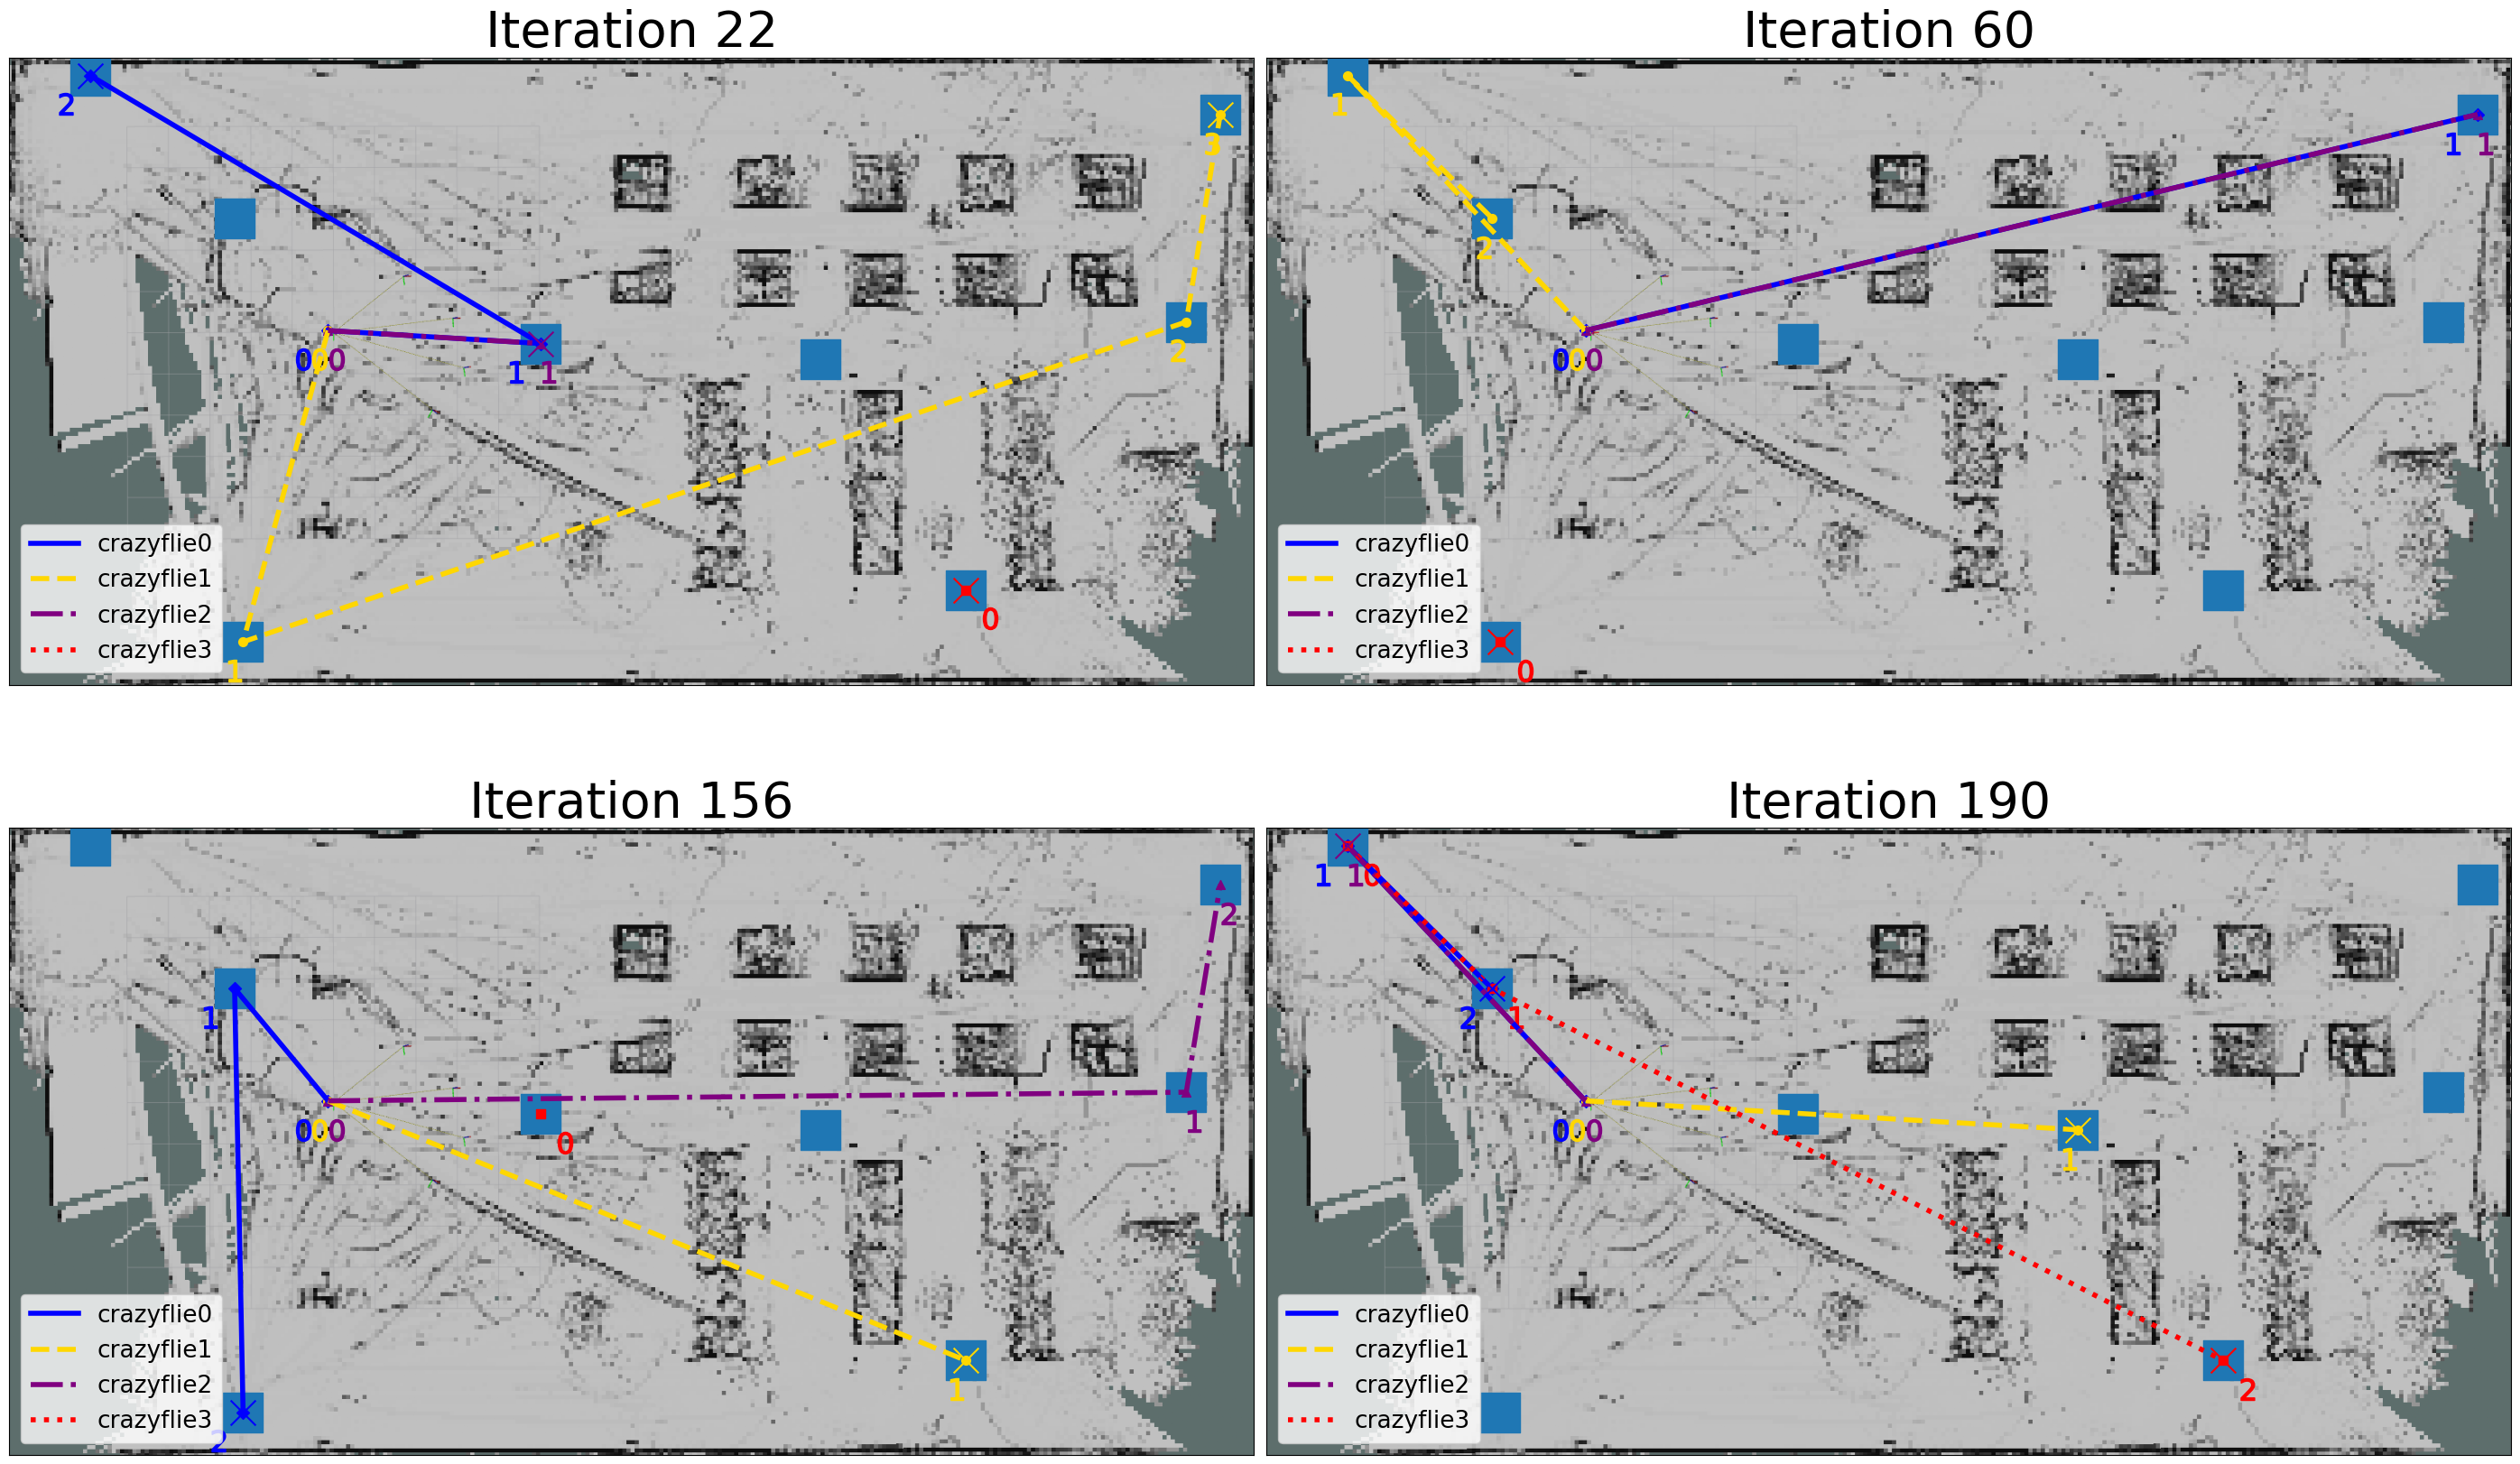

In [35]:
figure(figsize=(28, 18))    
for tes in range(len(testCases)):
    types = ['-','--','-.',':']
    n = ['Cr0','Cr1','Cr2','Cr3']
    color = ["blue",'gold','purple','red']
    shapes = ['D','o','^','s']
    counter = 0
    mult = -1.5
    
    img = imread("FieldM.png")

    plt.subplot(2, 2, tes+1)
    plt.imshow(img,zorder=0)

    xb = [(boxes[x][0]+7.5)*51.706 for x in range(len(boxes))]
    yb = [(boxes[x][1]+6.3)*52.62 for x in range(len(boxes))]
    plt.scatter(xb,yb, marker = 's',s=1000)

    for i in testCases[tes]:
        x = [(i[-1][x][0]+7.5)*51.706 for x in range(len(i[-1]))]
        y = [(i[-1][x][1]+6.3)*52.62 for x in range(len(i[-1]))]
        case = i[4]
        
        plt.plot(x,y, ls = types[counter],label=names[counter],linewidth = '4', color = color[counter])
        for i in range(len(x)):
            plt.scatter(x[i],y[i], marker = shapes[counter],s=50, c=color[counter])
            plt.scatter(x[i]+20*mult,y[i]+35, marker = f"${i}$",s=300, c=color[counter])
        if case == 0:
            plt.scatter(x[i],y[i], marker = 'x',s=400, c=color[counter], zorder=20)
        counter+= 1
        mult+=1

    plt.legend(loc =3, prop={'size': 19})
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])
    plt.title(f'Iteration {testCases[tes][0][1]}',fontsize = 40)
plt.tight_layout(pad=1.0)
plt.savefig('subGNStrat.png')
plt.show()